Memory growth enabled for PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
Anndata successfully constructed.
Anndata object counts are now normalized.
The total length of the genes list or feature set is: 2000.
Epoch 0, Avg Outcome Loss: 0.6884, Train AUC: 0.4971, Train Accuracy: 0.4518, Test AUC: 0.4913, Test Accuracy: 0.4520
Epoch 10, Avg Outcome Loss: 0.5718, Train AUC: 0.8643, Train Accuracy: 0.7818, Test AUC: 0.8590, Test Accuracy: 0.7797
Epoch 20, Avg Outcome Loss: 0.4387, Train AUC: 0.8889, Train Accuracy: 0.8035, Test AUC: 0.8771, Test Accuracy: 0.8034
Epoch 30, Avg Outcome Loss: 0.3799, Train AUC: 0.9257, Train Accuracy: 0.8448, Test AUC: 0.9034, Test Accuracy: 0.8319
Epoch 40, Avg Outcome Loss: 0.3115, Train AUC: 0.9510, Train Accuracy: 0.8821, Test AUC: 0.9177, Test Accuracy: 0.8395
max train accuracy: 0.91
max train auc: 0.97
max test accuracy: 0.86
max test auc: 0.93


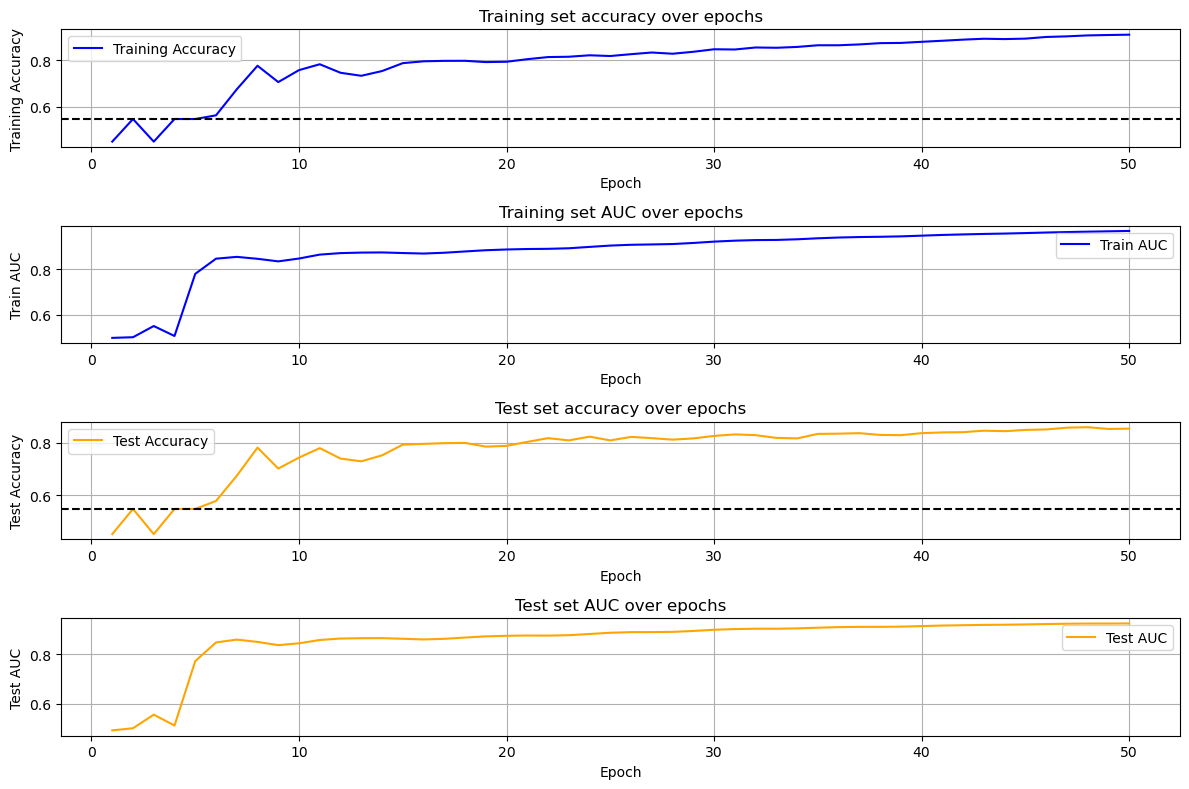

In [4]:
import PAGEpy_plot
import pso
from format_data_class import FormatData
from pred_ann_model import PredAnnModel
import pickle
import pandas as pd
import PAGEpy_utils

#memory growth is enabled for for the gpu
PAGEpy_utils.init_cuda()

# HVGs are selected by default, as opposed to the differential expression 
current_data = FormatData(hvg_count = 2000)
current_data = FormatData(hvg_count = 2000, data_dir = '/your/dir/with_single_cell_data/', gene_selection = 'Diff', pval_correction = 'benjamini-hochberg')

# the selected genes can be loaded from the local directory, however, they are also an attribte of the FormatData object
genes_path = '/your/dir/feature_set.pkl'

with open(genes_path, 'rb') as f:
    current_genes = pickle.load(f)

# train the model
old_model = PredAnnModel(current_data,current_genes,num_epochs=50)

# evaluate the model
PAGEpy_plot.evaluate_model(old_model, current_data)

In [ ]:
# the pso algorithm can be use to optimze the solution
best_solution, best_fitness = pso.binary_pso(current_genes, current_data, 200, 15,  C1 = 2, C2 = 1.5)

In [ ]:
# the results of pso optimizatoin can be monitored
pso_df = pd.read_pickle("pso_df.pkl")
pso_dict = pd.read_pickle("pso_dict.pkl")

PAGEpy_plot.plot_pso_row_averages(pso_df)

PAGEpy_plot.plot_hamming_distance(pso_dict)
PAGEpy_plot.plot_sorted_frequencies(pso_dict, pso_df)

In [1]:
# the optimised solution is saved locally, however, the returned varible from the binary_pso function can also be passed to the model (see below)                                             
# pso_genes = [item for item, m in zip(current_genes, best_solution) if m == 1]

# othervise just load the locally stored result file

# Load the saved genes list
with open('pso_genes_result.pkl', 'rb') as f:
    pso_genes = pickle.load(f)

[1] "test"


In [ ]:
# now use this gene list to train a new model, which you can then evaluate
new_model = PredAnnModel(current_data,pso_genes,num_epochs=500)
PAGEpy_plot.evaluate_model(new_model, current_data)